# Proyecto BI - Análitica de Texto según ODS

## Etapa 1

## Objetivos

*   Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos del negocio en un contexto de aplicación.
*   Planear la interacción con un grupo interdisciplinario para identificar usuarios y posibles herramientas a desarrollar para la interacción del resultado del modelo desarrollado.

## Problema
<p style="text-align: justify;"> Desarrollar un modelo de clasificación, con técnicas de aprendizaje automático, que permita relacionar de manera automática un texto según los ODS. Al igual que desarrollar una aplicación que facilite la interacción con el resultado de dicho modelo. El modelo podrá ser utilizado entonces para la interpretación y análisis de la información textual que es recopilada a través de diferentes fuentes por UNFPA en procesos de planeación participativa para el desarrollo a nivel territorial.


### 1. Instalación e importanción de librerías.

In [1040]:
!pip install ftfy

In [1041]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [1042]:
!pip install unidecode

In [1043]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions

In [1044]:
# librería para manejar las flexiones gramaticales en el idioma inglés.
# !pip install inflect
# !pip install pandas-profiling==2.7.1

In [1045]:
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1046]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1047]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport
from unidecode import unidecode

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
nltk.download('wordnet')


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from nltk.tokenize import word_tokenize
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score, accuracy_score,
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1048]:
import warnings
warnings.filterwarnings("ignore")

In [1049]:
# Configuring pandas to show all cell content
pd.set_option("display.max_colwidth", None)

In [1050]:
# Downloading stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1051]:
stop_words


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

## 2. Perfilamiento y entendimiento de los datos


#### Lectura de los datos.

In [1052]:
# Uso de la libreria pandas para la lectura de archivos excel
df = pd.read_excel('./data/cat_345.xlsx')
df_nuevo = pd.read_excel('./data/SinEtiquetatest_cat_345.xlsx')
# Asignación a una nueva variable de los datos leidos
data_t=df
data_t_nuevo=df_nuevo


In [1053]:
data_t.shape

(3000, 2)

In [1054]:
data_t_nuevo.shape

(1759, 2)

In [1055]:
data_t.sample(5)

,Textos_espanol,sdg
1285,"El certificado de finalización de la educación secundaria superior general (Abitur) se obtiene después de 12 o 13 años de educación. Existe una fuerte cooperación entre las instituciones educativas, los empleadores y otros interlocutores sociales que también trabajan juntos en el ajuste de los planes de estudio. En 2011, las tasas de empleo de los adultos que alcanzaron el nivel secundario superior profesional fueron 17 puntos porcentuales más altas que las de aquellos que obtuvieron programas generales (en comparación con la brecha promedio de la OCDE de 5 puntos porcentuales).",4
1906,"Además, hacer que la profesión docente sea más atractiva y competitiva mejoraría la calidad. Las desigualdades se derivan en primer lugar de la brecha urbano-rural y en segundo lugar de la estratificación social, mientras que las diferencias de edad, género y región contribuyen en menor medida. Una mayor financiación central al nivel obligatorio garantizaría una calidad mínima. Los niños migrantes deben tener acceso a las escuelas públicas o vales para las escuelas privadas.",4
931,"Son progresivas, prolongadas y difíciles de controlar y, por tanto, más costosas de tratar. A esto se suma la mayor incidencia de otros eventos, como lesiones y caídas, que tienen importantes implicaciones en términos de mantenimiento de la funcionalidad durante la vejez. En el mundo desarrollado, el proceso de envejecimiento tuvo lugar una vez que las sociedades alcanzaron niveles de vida más altos, menos desigualdad social y económica y un acceso más equitativo a los servicios de salud.",3
390,"Podría explotarse la redistribución de tareas a las enfermeras o al equipo clínico más amplio, especialmente en las instalaciones de emergencia que enfrentan presiones crecientes por el lado de la demanda. Además, se necesita con urgencia una respuesta más coordinada y más rápida del departamento de emergencias. Hay ejemplos innovadores que se pueden encontrar en Japón o en otros países de la OCDE.",3
594,"El programa se basaba en la integración estratégica de todos los organismos pertinentes implicados en la prestación de servicios de salud mental para este grupo, y en la identificación de las necesidades de los niños en el contexto escolar. Además de formar a los profesores, el programa incluía programas de aprendizaje social y emocional. Los ""padres y la comunidad"" también participaron en los aspectos sociales y de aprendizaje de la iniciativa.",3


In [1056]:
data_t_nuevo.sample(5)

,Textos_espanol,sdg
62,"Los días 9 y 10 de abril de 2018 tuvo lugar en Estocolmo una misión exploratoria que incluyó reuniones con funcionarios del Ministerio de Educación e Investigación, la Agencia Nacional de Educación y representantes de instituciones de formación del profesorado, municipios, escuelas independientes, sindicatos de profesores y directores, así como investigadores (anexo A). En cada sección se describen las políticas actuales, se analiza la situación y se ofrecen a Suecia ejemplos prometedores de países homólogos en varios niveles políticos: el aula, la escuela (o la universidad en algunos casos), el municipio, la región y el sistema. Con ello se pretende subrayar la responsabilidad compartida a todos los niveles del sistema educativo en la integración de los alumnos inmigrantes y refugiados. Por último, se ofrecen sugerencias políticas para orientar a Suecia sobre la mejor manera de responder a los actuales retos de integración en estos cuatro ámbitos.",NaN
1448,"Hubo reducciones de 69% y 75% en la tasa de mortalidad por diabetes, y disminuciones de 72% y 75% por enfermedad renal. Además de mejores resultados de salud, el estudio también demuestra la rentabilidad de fortalecer la atención primaria de salud (Zhao et al., En algunas áreas, un bajo volumen de pacientes hace inviable un hospital o un especialista. Estos también son lugares que no son percibidos por los profesionales de la salud como atractivos para vivir.",NaN
298,"Las polÃticas macroeconÃ³micas conforman el entorno econÃ³mico general para la realizaciÃ³n de los derechos econÃ³micos y sociales de las mujeres a travÃ©s de su impacto sobre la creaciÃ³n de empleo y el espacio fiscal en particular. Por tanto, la forma en que se diseÃ±en y apliquen las polÃticas macroeconÃ³micas tendrÃ¡ un impacto directo en la probabilidad de que se logre la igualdad de gÃ©nero. Dos grandes categorÃas de polÃticas macroeconÃ³micas son la polÃtica fiscal y la polÃtica monetaria.",NaN
1666,"El gobierno decidió recientemente establecer una formación especializada para enfermeras en cuidados crónicos fuera de los hospitales, con estas enfermeras muy probablemente empleadas en prácticas de médicos generales y servicios de salud municipales. Las regiones también invirtieron en centros de especialidades múltiples llamados 'Casas de salud', que incluyen médicos de cabecera (que también actúan como coordinadores de la atención), especialistas y fisioterapeutas, aunque han surgido dificultades para contratar médicos de cabecera (consulte la Sección 5.2). El sistema de atención primaria parece estar resistiendo bien a pesar de las reducciones en la actividad de atención aguda descritas anteriormente, aunque las hospitalizaciones evitables por ciertas afecciones son más altas que el promedio de la UE (consulte la Sección S.3).",NaN
299,"Rumanía informó de que la cantidad de estimulantes de tipo anfetamínico incautada en 2014 fue casi 11 veces superior a la incautada en 2013. En 2014, Austria informó de la detección de tres laboratorios de anfetamina y nueve de metanfetamina, mientras que las autoridades alemanas desmantelaron 11 laboratorios de anfetamina y tres laboratorios que habían estado fabricando metanfetamina a partir de pseudoefedrina extraída de descongestionantes nasales. En la República Checa, el número de laboratorios de metanfetamina desmantelados aumentó ligeramente a 272 en 2014, frente a los 262 desmantelados en 2013.",NaN


### 2.1 Limpieza de datos

In [1057]:
data_t["sdg"].value_counts(dropna=False, normalize=True)

sdg
3    0.333333
4    0.333333
5    0.333333
Name: proportion, dtype: float64

In [1058]:
data_t_nuevo["sdg"].value_counts(dropna=False, normalize=True)

sdg
NaN    1.0
Name: proportion, dtype: float64

Se puede ver una distribución equitativa de los datos en los tres grupos de ODS

In [1059]:
data_t["Textos_espanol"] = data_t["Textos_espanol"].astype(str)

In [1060]:
data_t_nuevo["Textos_espanol"] = data_t_nuevo["Textos_espanol"].astype(str)

### 2.2 Corrección de palabras mal codificadas

In [1061]:
import ftfy

def fix_malformed_words(text):
    # Utiliza ftfy para corregir problemas de codificación
    text = ftfy.fix_text(text)
    return text

# Aplica la función a tu DataFrame
data_t['Textos_espanol'] = data_t['Textos_espanol'].apply(fix_malformed_words)



In [1062]:
import ftfy

def fix_malformed_words(text):
    # Utiliza ftfy para corregir problemas de codificación
    text = ftfy.fix_text(text)
    return text

# Aplica la función a tu DataFrame
data_t_nuevo['Textos_espanol'] = data_t_nuevo['Textos_espanol'].apply(fix_malformed_words)

In [1063]:
#Se verifica que se haya realizado la corrección
data_t.head(5)

,Textos_espanol,sdg
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la alta mor

In [1064]:
#Se verifica que se haya realizado la corrección
data_t_nuevo.head(5)

,Textos_espanol,sdg
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",NaN
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN
2,"AsÃ, por ejemplo, el estigma asociado a los beneficiarios de prestaciones sociales o a los pobres aumenta su desventaja. Del mismo modo, los errores de dignidad y reconocimiento pueden causar desventajas.54 La infravaloración del trabajo de las mujeres es un error de reconocimiento que causa directamente desventajas socioeconómicas, por lo que el derecho a la igualdad de retribución por un trabajo de igual valor es una sÃntesis importante de las dos primeras dimensiones del derecho a la igualdad: reparar la desventaja y abordar el estigma y los estereotipos. Tanto el Comité de Derechos Económicos, Sociales y Culturales como el Comité para la Eliminación de la Discriminación contra la Mujer han dado este paso. Directrices para la presentación de informes"", párrafo 29, CDESC, Ecuador, op. cit.",NaN
3,"Hay muchos profesores no cualificados en las escuelas, ya que es difícil contratar a profesores cualificados. Un indicio del reconocimiento del importante papel de los profesores en este contexto es la inclusión por Alberta de preguntas adicionales en la Encuesta Internacional sobre la Enseñanza y el Aprendizaje de la OCDE de 2018 relativas a la comprensión por parte de los profesores y los lÃderes escolares de cuestiones relacionadas con las culturas indÃgenas, la historia y el trabajo con alumnos indÃgenas, asà como sobre el desarrollo profesional pertinente. El enfoque holÃstico de los pueblos indÃgenas hace hincapié en lo mucho que estos contribuyen al bienestar general de los niños, asà como al de todos los demás, además de factores como las ventajas y desventajas materiales. El trauma sufrido por los pueblos indígenas, incluso a través del sistema de escuelas residenciales, todavía es sentido agudamente por muchos. De hecho, se nos dijo que los síntomas del trauma pueden aumentar en lugar de disminuir con el paso del tiempo, exacerbados por las relaciones intergeneracionales. Frente a este panorama más amplio, pueden comprenderse mejor los estudios específicos de determinadas 

### 2.3 Eliminación de caracteres especiales y puntuación

In [1065]:
import re
import unicodedata
import inflect
from nltk.corpus import stopwords

# Esta lista contiene las stop words en español
spanish_stopwords = set(stopwords.words('spanish'))

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in spanish_stopwords:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words


### 2.4 Tokenización

In [1066]:
data_t['Textos_espanol'] = data_t['Textos_espanol'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [1067]:
data_t_nuevo['Textos_espanol'] = data_t_nuevo['Textos_espanol'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [1068]:
data_t['words'] = data_t['Textos_espanol'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data_t.head()

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, numero, consultas, externas, especialistas, three hundred and nineteen, cada, mil, derechohabientes, sp, comparacion, three hundred and thirtyeight, six hundred and twenty, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacion, ligeramente, mayor, issste, pueden, justificarse, manera, numero, recetas, pudieron, ser, surtidas, totalidad, farmaceutico, debido, falta, existencias, thirtythree, dentro, sp, comparacion, fourteen, dentro, imss, segun, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[two thousand and seven, gobierno, central, financio, directamente, solo, 03, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, 56, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes, sociales, 

In [1069]:
data_t_nuevo['words'] = data_t_nuevo['Textos_espanol'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data_t_nuevo.head()

,Textos_espanol,sdg,words
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",NaN,"[basa, nueve, anos, educacion, basica, seis, primaria, tres, secundaria, alumnos, acceden, segundo, ciclo, secundaria, pueden, ir, centro, orientacion, mas, academica, centro, formacion, profesional, aplica, sistema, islamico, islamico, ensenanza, secundaria, superior, formal, comprende, ensenanza, general, sekolah, menengah, atas, sma, ensenanza, profesional, sekolah, menengah, kejuruan, smk, escuelas, secundarias, superiores, islamicas, madrasah, aliyah, ma, ensenanza, profesional, islamica, madrasah, aliyah, kejuruan, mak, capitulo, centra, principalmente, ensenanza, secundaria, superior, academica, mientras, capitulo, five, trata, formacion, profesional, trabajando, desarrollo, colegios, comunitarios, vias, alternativas, acceso, ensenanza, superior]"
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN,"[ultima, decada, particular, two thousand and ten, numero, altas, per, capita, tendido, disminuir, ahora, linea, media, ocde, mencionada, anteriormente, ejemplo, habitantes, zonas, rurales, representan, fortythree, poblacion, solo, thirtytwo, altas, hospitalarias, falta, informacion, complementaria, posible, determinar, si, diferencia, indica, disparidades, acceso, poblaciones, rurales, caso, afirmativo, si, causas, geograficas, culturales, infraestructurales, parece, recojan, datos, acceso, atencion, punto, vista, paciente, ayudaria, comprender, naturaleza, obstaculos, acceso, soluciones, general, posible, determinar, datos, disponibles, si, ingresos, caracteristicas, socioeconomicas, pacientes, influyen, hora, llegar, puertas, hospital, ser, ingresado, acceso, desigual, probablemente, deba, tambien, incapacidad, centros, distintas, regiones, prestar, mismos, servicios]"
2,"AsÃ, por ejemplo, el estigma asociado a los beneficiarios de prestaciones sociales o a los pobres aumenta su desventaja. Del mismo modo, los errores de dignidad y reconocimiento pueden causar desventajas.54 La infravaloración del trabajo de las mujeres es un error de reconocimiento que causa directamente desventajas socioeconómicas, por lo que el derech

### 2.5 Normalización de texto

In [1070]:
# Crear instancias de los stemmers y lematizadores
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_words(words):
    """Stem words in list of tokenized words"""
    stems = [stemmer.stem(word) for word in words]
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmas = []
    for word in words:
        pos = get_wordnet_pos(word)
        if pos:
            lemma = lemmatizer.lemmatize(word, pos)
            lemmas.append(lemma)
        else:
            lemmas.append(word)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(stems)
    return lemmas

def get_wordnet_pos(word):
    """Map POS tag to first character accepted by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


In [1071]:
#Se verifica que se haya realizado la corrección
data_t.head(5)

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, numero, consultas, externas, especialistas, three hundred and nineteen, cada, mil, derechohabientes, sp, comparacion, three hundred and thirtyeight, six hundred and twenty, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacion, ligeramente, mayor, issste, pueden, justificarse, manera, numero, recetas, pudieron, ser, surtidas, totalidad, farmaceutico, debido, falta, existencias, thirtythree, dentro, sp, comparacion, fourteen, dentro, imss, segun, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[two thousand and seven, gobierno, central, financio, directamente, solo, 03, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, 56, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes, sociales, 

In [1072]:
#Se verifica que se haya realizado la corrección
data_t_nuevo.head(5)

,Textos_espanol,sdg,words
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",NaN,"[basa, nueve, anos, educacion, basica, seis, primaria, tres, secundaria, alumnos, acceden, segundo, ciclo, secundaria, pueden, ir, centro, orientacion, mas, academica, centro, formacion, profesional, aplica, sistema, islamico, islamico, ensenanza, secundaria, superior, formal, comprende, ensenanza, general, sekolah, menengah, atas, sma, ensenanza, profesional, sekolah, menengah, kejuruan, smk, escuelas, secundarias, superiores, islamicas, madrasah, aliyah, ma, ensenanza, profesional, islamica, madrasah, aliyah, kejuruan, mak, capitulo, centra, principalmente, ensenanza, secundaria, superior, academica, mientras, capitulo, five, trata, formacion, profesional, trabajando, desarrollo, colegios, comunitarios, vias, alternativas, acceso, ensenanza, superior]"
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN,"[ultima, decada, particular, two thousand and ten, numero, altas, per, capita, tendido, disminuir, ahora, linea, media, ocde, mencionada, anteriormente, ejemplo, habitantes, zonas, rurales, representan, fortythree, poblacion, solo, thirtytwo, altas, hospitalarias, falta, informacion, complementaria, posible, determinar, si, diferencia, indica, disparidades, acceso, poblaciones, rurales, caso, afirmativo, si, causas, geograficas, culturales, infraestructurales, parece, recojan, datos, acceso, atencion, punto, vista, paciente, ayudaria, comprender, naturaleza, obstaculos, acceso, soluciones, general, posible, determinar, datos, disponibles, si, ingresos, caracteristicas, socioeconomicas, pacientes, influyen, hora, llegar, puertas, hospital, ser, ingresado, acceso, desigual, probablemente, deba, tambien, incapacidad, centros, distintas, regiones, prestar, mismos, servicios]"
2,"AsÃ, por ejemplo, el estigma asociado a los beneficiarios de prestaciones sociales o a los pobres aumenta su desventaja. Del mismo modo, los errores de dignidad y reconocimiento pueden causar desventajas.54 La infravaloración del trabajo de las mujeres es un error de reconocimiento que causa directamente desventajas socioeconómicas, por lo que el derech

#### Selección de campos

In [1073]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,ejemplo numero consultas externas especialistas three hundred and nineteen cada mil derechohabientes sp comparacion three hundred and thirtyeight six hundred and twenty cada mil derechohabientes imss issste respectivamente si bien diferencias pueden reflejar necesidad desigual poblacion ligeramente mayor issste pueden justificarse manera numero recetas pudieron ser surtidas totalidad farmaceutico debido falta existencias thirtythree dentro sp comparacion fourteen dentro imss segun datos encuesta aunque propias cifras institutos ss sugieren tasas mas altas recetas surtidas ambas cifras encuentran mas altas ocde gasto bolsillo reducido significativamente ultima decada pesar esfuerzos lograr cobertura sanitaria universal traves reforma sp
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,two thousand and seven gobierno central financio directamente solo 03 gasto total salud realizo transferencias especificas gasto salud ascendieron 56 gasto total mayor parte gasto presupuestario salud realizan gobiernos condados condados pobres solo pueden ofrecer bajo nivel atencion poblacion local gobierno provincial proporciona subsidios lado oferta hospitales
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,claramente factores juego particular variedad barreras determinantes sociales pueden relacionados genero clase etnia casta idioma religion surgen estructuras normas procesos sociales arraigados aceptan incluso fomentan dist

In [1074]:
data_t_nuevo['words'] = data_t_nuevo['words'].apply(lambda x: ' '.join(map(str, x)))
data_t_nuevo

,Textos_espanol,sdg,words
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",NaN,basa nueve anos educacion basica seis primaria tres secundaria alumnos acceden segundo ciclo secundaria pueden ir centro orientacion mas academica centro formacion profesional aplica sistema islamico islamico ensenanza secundaria superior formal comprende ensenanza general sekolah menengah atas sma ensenanza profesional sekolah menengah kejuruan smk escuelas secundarias superiores islamicas madrasah aliyah ma ensenanza profesional islamica madrasah aliyah kejuruan mak capitulo centra principalmente ensenanza secundaria superior academica mientras capitulo five trata formacion profesional trabajando desarrollo colegios comunitarios vias alternativas acceso ensenanza superior
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN,ultima decada particular two thousand and ten numero altas per capita tendido disminuir ahora linea media ocde mencionada anteriormente ejemplo habitantes zonas rurales representan fortythree poblacion solo thirtytwo altas hospitalarias falta informacion complementaria posible determinar si diferencia indica disparidades acceso poblaciones rurales caso afirmativo si causas geograficas culturales infraestructurales parece recojan datos acceso atencion punto vista paciente ayudaria comprender naturaleza obstaculos acceso soluciones general posible determinar datos disponibles si ingresos caracteristicas socioeconomicas pacientes influyen hora llegar puertas hospital ser ingresado acceso desigual probablemente deba tambien incapacidad centros distintas regiones prestar mismos servicios
2,"AsÃ, por ejemplo, el estigma asociado a los beneficiarios de prestaciones sociales o a los pobres aumenta su desventaja. Del mismo modo, los errores de dignidad y reconocimiento pueden causar desventajas.54 La infravaloración del trabajo de las mujeres es un error de reconocimiento que causa directamente desventajas socioeconómicas, por lo que el derecho a la igualdad de retribución por un trabajo de igual valor es una sÃntesis importante de las dos primeras dimensiones del derecho a la igualdad: reparar la desventaja y abor

In [1075]:
data_t.to_csv('datos_limpios.csv', index=False)

### 3. Entrenamiento del modelo con TF_IDF

En TF-IDF Los valores no son necesariamente enteros, ya que dependen de la frecuencia de un término en un documento específico y en la colección de documentos en su conjunto.

#### 3.1 Data splitting

In [1076]:
X_train, X_test, y_train, y_test = train_test_split(data_t[["words"]], data_t["sdg"], random_state=1, stratify=data_t['sdg'])

In [1077]:
X_train.shape, X_test.shape

((2250, 1), (750, 1))

In [1078]:
y_train.shape, y_test.shape

((2250,), (750,))

In [1079]:
#ver los primeros datos de entrenamiento
y_train[:5]

876     3
2518    5
2775    5
1910    4
2776    5
Name: sdg, dtype: int64

In [1080]:
pd.Series(y_train).value_counts(normalize=True)

sdg
3    0.333333
5    0.333333
4    0.333333
Name: proportion, dtype: float64

In [1081]:
pd.Series(y_test).value_counts(normalize=True)

sdg
4    0.333333
5    0.333333
3    0.333333
Name: proportion, dtype: float64

#### 3.2 Vectorización del texto

In [1082]:
# Supongamos que tienes un DataFrame llamado 'df' con una columna 'words' que contiene tus textos preprocesados.
texts = X_train['words']


# Crea una instancia de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize,  # Número máximo de características (ajusta según sea necesario)
                                   stop_words= stop_words, # Especifica las stop words
                                   lowercase=True)

# Ajusta y transforma tus datos de texto
X_tfidf = tfidf_vectorizer.fit_transform(texts)


# tfidf_matrix es una matriz que contiene las representaciones TF-IDF de tus textos

print(X_tfidf.shape)

print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))


(2250, 15111)
Vocabulary size: 15111


### 3.3 Selección del modelo

### Primer modelo

In [1083]:
tfidf_model = RandomForestClassifier(random_state=3)

In [1084]:
print("Shape de X_tfidf:", X_train.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)
print("Ejemplos de y_train:", y_train[:10])  # Imprime las primeras 10 etiquetas
print("Ejemplos de y_test:", y_test[:10])    # Imprime las primeras 10 etiquetas

Shape de X_tfidf: (2250, 1)
Shape de y_train: (2250,)
Shape de y_test: (750,)
Ejemplos de y_train: 876     3
2518    5
2775    5
1910    4
2776    5
2642    5
2251    5
1442    4
1028    4
1592    4
Name: sdg, dtype: int64
Ejemplos de y_test: 1731    4
1436    4
2611    5
2211    5
2955    5
1247    4
777     3
1253    4
1244    4
2180    5
Name: sdg, dtype: int64


In [1085]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

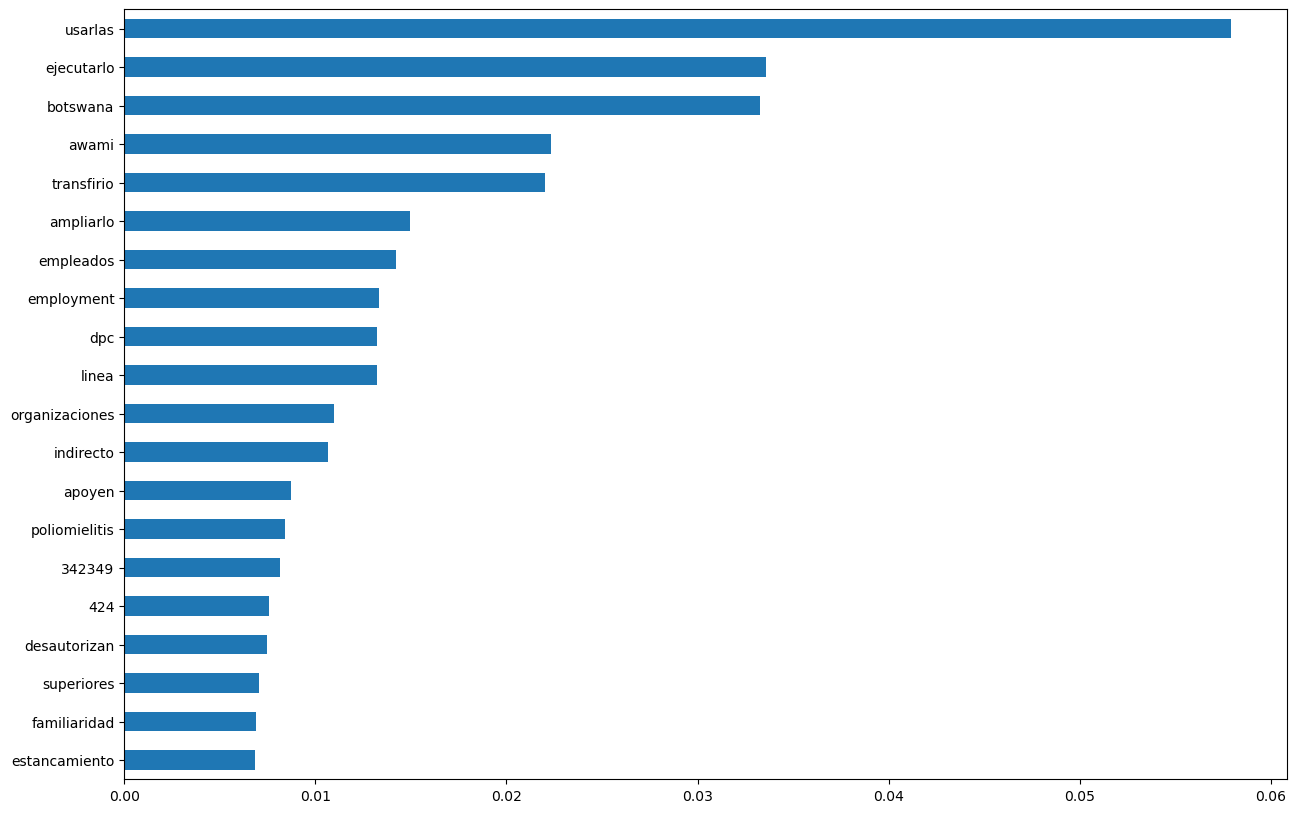

In [1086]:
pd.Series(tfidf_model.feature_importances_, index=tfidf_vectorizer.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [1087]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 98.46


In [1088]:

# predicciones en función de las características de entrenamiento vectorizadas
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
# predicciones en función de las características de prueba vectorizadas en X_test["words"]
y_test_tfidf_predict = tfidf_model.predict(tfidf_vectorizer.transform(X_test["words"]))

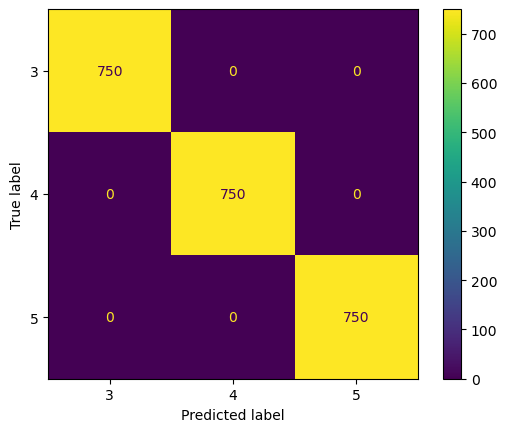

In [1089]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

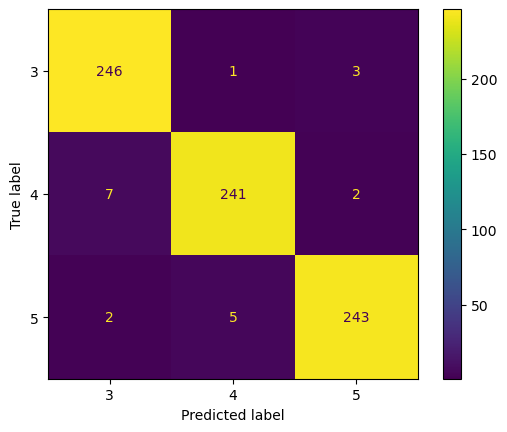

In [1090]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

#### Métricas para del data frame de entrenamiento

In [1091]:
print("Precision (weighted):", precision_score(y_train, y_train_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_train, y_train_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_train, y_train_tfidf_predict, average='weighted'))


Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


#### Métricas para de data frame de prueba

In [1092]:
print("Precision (weighted):", precision_score(y_test, y_test_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_test_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_test, y_test_tfidf_predict, average='weighted'))

Precision (weighted): 0.9734176980182174
Recall (weighted): 0.9733333333333334
F1 (weighted): 0.9733266512270969


### Segundo modelo

In [1093]:
X_train_1=X_train
X_test_1=X_test
y_train_1=y_train
y_test_1=y_test

In [1094]:
parametros_1 = {
    "vectorizer": TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words),
    "vectorizer__lowercase": True,
    "classifier__n_estimators": 100,
    "classifier__criterion": 'gini',
    "classifier__max_depth": 50
}

In [1095]:
pipeline_1 = Pipeline(steps=[
    ("vectorizer", parametros_1["vectorizer"]),
    ("classifier", RandomForestClassifier(
        n_estimators=parametros_1["classifier__n_estimators"],
        criterion=parametros_1["classifier__criterion"],
        max_depth=parametros_1["classifier__max_depth"],
        random_state=4
    ))
])

In [1096]:
# Entrena el modelo con tus datos
pipeline_1.fit(X_train_1["words"], y_train_1)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x12f1f9240>)),
                ('classifier',
                 RandomForestClassifier(max_depth=50, random_state=4))])

In [1097]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_predict_1 = pipeline_1.predict(X_train_1["words"])
y_test_predict_1 = pipeline_1.predict(X_test_1["words"])

In [1098]:
print("Precision (weighted):", precision_score(y_train_1, y_train_predict_1, average='weighted'))
print("Recall (weighted):", recall_score(y_train_1, y_train_predict_1, average='weighted'))
print("F1 (weighted):", f1_score(y_train_1, y_train_predict_1, average='weighted'))

Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


In [1099]:
print("Precision (weighted):", precision_score(y_test_1, y_test_predict_1, average='weighted'))
print("Recall (weighted):", recall_score(y_test_1, y_test_predict_1, average='weighted'))
print("F1 (weighted):", f1_score(y_test_1, y_test_predict_1, average='weighted'))

Precision (weighted): 0.9695690498076077
Recall (weighted): 0.9693333333333334
F1 (weighted): 0.9693568827441543


#### Tercer Modelo

In [1100]:
X_train_2=X_train
X_test_2=X_test
y_train_2=y_train
y_test_2=y_test

In [1101]:
parametros_2 = {
    "vectorizer": TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words),
    "vectorizer__lowercase": True,
    "classifier__n_estimators": 300,
    "classifier__criterion": 'gini',
    "classifier__max_depth": 100
}

In [1102]:
pipeline_2 = Pipeline(steps=[
    ("vectorizer", parametros_2["vectorizer"]),
    ("classifier", RandomForestClassifier(
        n_estimators=parametros_2["classifier__n_estimators"],
        criterion=parametros_2["classifier__criterion"],
        max_depth=parametros_2["classifier__max_depth"],
        random_state=4
    ))
])

In [1103]:
# Entrena el modelo con tus datos
pipeline_2.fit(X_train_2["words"], y_train_2)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x12f1f9240>)),
                ('classifier',
                 RandomForestClassifier(max_depth=100, n_estimators=300,
                                        random_state=4))])

In [1104]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_predict_2 = pipeline_2.predict(X_train_2["words"])
y_test_predict_2 = pipeline_2.predict(X_test_2["words"])

In [1105]:
print("Precision (weighted):", precision_score(y_train_2, y_train_predict_2, average='weighted'))
print("Recall (weighted):", recall_score(y_train_2, y_train_predict_2, average='weighted'))
print("F1 (weighted):", f1_score(y_train_2, y_train_predict_2, average='weighted'))

Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


In [1106]:
print("Precision (weighted):", precision_score(y_test_2, y_test_predict_2, average='weighted'))
print("Recall (weighted):", recall_score(y_test_2, y_test_predict_2, average='weighted'))
print("F1 (weighted):", f1_score(y_test_2, y_test_predict_2, average='weighted'))

Precision (weighted): 0.980112114934346
Recall (weighted): 0.98
F1 (weighted): 0.9800069226577939


#### Cuarto modelo

In [1107]:
X_train_3=X_train
X_test_3=X_test
y_train_3=y_train
y_test_3=y_test

In [1108]:
parametros_3 = {
    "vectorizer": TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words),
    "vectorizer__lowercase": False,
    "classifier__n_estimators": 350,
    "classifier__criterion": 'gini',
    "classifier__max_depth": 100
}

In [1109]:
pipeline_3 = Pipeline(steps=[
    ("vectorizer", parametros_3["vectorizer"]),
    ("classifier", RandomForestClassifier(
        n_estimators=parametros_3["classifier__n_estimators"],
        criterion=parametros_3["classifier__criterion"],
        max_depth=parametros_3["classifier__max_depth"],
        random_state=4
    ))
])

In [1110]:
# Entrena el modelo con tus datos
pipeline_3.fit(X_train_3["words"], y_train_3)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x12f1f9240>)),
                ('classifier',
                 RandomForestClassifier(max_depth=100, n_estimators=350,
                                        random_state=4))])

In [1111]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_predict_3 = pipeline_3.predict(X_train_3["words"])
y_test_predict_3 = pipeline_3.predict(X_test_3["words"])

In [1112]:
print("Precision (weighted):", precision_score(y_train_3, y_train_predict_3, average='weighted'))
print("Recall (weighted):", recall_score(y_train_3, y_train_predict_3, average='weighted'))
print("F1 (weighted):", f1_score(y_train_3, y_train_predict_3, average='weighted'))

Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


In [1113]:
print("Precision (weighted):", precision_score(y_test_3, y_test_predict_3, average='weighted'))
print("Recall (weighted):", recall_score(y_test_3, y_test_predict_3, average='weighted'))
print("F1 (weighted):", f1_score(y_test_3, y_test_predict_3, average='weighted'))

Precision (weighted): 0.97883455634278
Recall (weighted): 0.9786666666666667
F1 (weighted): 0.9786810454293615


#### Quinto modelo

In [1114]:
X_train_4=X_train
X_test_4=X_test
y_train_4=y_train
y_test_4=y_test

In [1115]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_4["words"])
X_test_tfidf = tfidf_vectorizer.transform(X_test_4["words"])
# y_test_tfidf = tfidf_vectorizer.transform(y_test_4)
# y_train_tfidf = tfidf_vectorizer.transform(y_train_4)

In [1116]:
tree_model = DecisionTreeClassifier(max_depth=10, random_state=4)

In [1117]:
tree_model.fit(X_train_tfidf, y_train_4)


DecisionTreeClassifier(max_depth=10, random_state=4)

In [1118]:
y_train_predict_4 = tree_model.predict(X_train_tfidf)
y_test_predict_4 = tree_model.predict(X_test_tfidf)

In [1119]:
print("Precision (weighted):", precision_score(y_train_4, y_train_predict_4, average='weighted'))
print("Recall (weighted):", recall_score(y_train_4, y_train_predict_4, average='weighted'))
print("F1 (weighted):", f1_score(y_train_4, y_train_predict_4, average='weighted'))

Precision (weighted): 0.954462691898449
Recall (weighted): 0.9515555555555556
F1 (weighted): 0.9519843106683067


### 4. Generar predicciones

In [1120]:
data_t_nuevo.sample(5)

,Textos_espanol,sdg,words
178,"Asimismo, los puntos de referencia internacionales sobre el rendimiento de los estudiantes proporcionados por las encuestas internacionales de estudiantes, como PISA y TIMSS, han influido a la hora de impulsar el desarrollo de políticas a nivel del sistema. Además, el NCESE (cuyos servicios, a partir de 2015, se integraron en el IAC) también realiza encuestas para evaluar las opiniones de la sociedad sobre la educación, que incluyen la recopilación de opiniones y perspectivas de directores, profesores, padres, estudiantes y posibles empleadores. Por el contrario, no existe un marco para evaluar el trabajo de los Departamentos de Educación de los rayons y oblasts, aunque la supervisión de su trabajo pueda seguirse sobre la base de los resultados de aprendizaje de los estudiantes.",NaN,asimismo puntos referencia internacionales rendimiento estudiantes proporcionados encuestas internacionales estudiantes pisa timss influido hora impulsar desarrollo politicas nivel sistema ademas ncese cuyos servicios partir two thousand and fifteen integraron iac tambien realiza encuestas evaluar opiniones sociedad educacion incluyen recopilacion opiniones perspectivas directores profesores padres estudiantes posibles empleadores contrario existe marco evaluar trabajo departamentos educacion rayons oblasts aunque supervision trabajo pueda seguirse base resultados aprendizaje estudiantes
860,"En 2014, una nueva ley electoral incluso requería que los partidos alcanzaran la paridad de género en las listas de candidatos para las elecciones legislativas federales y estatales y que alternaran los géneros dentro de las listas (OCDE, 2017(9)). En las últimas elecciones antes de que se introdujeran las cuotas en 2007, 18 mujeres fueron elegidas para el parlamento nacional, en 2009, las primeras elecciones tras la introducción de la cuota, 52 mujeres fueron elegidas (un cambio del 189 %). En Eslovenia, solo se ha percibido un cambio modesto: 11 mujeres fueron elegidas en las últimas elecciones antes de que se introdujera la cuota en 2004 y 12 durante las primeras elecciones después de que se aplicara la cuota en 2008 (un cambio del 9 %), sin embargo, el número de mujeres candidatas aumentó en 2008 aunque el número total de candidatos disminuyó ( El 24% del total de candidatos fueron mujeres en 2004 frente al 35% en 2008. En Polonia, en las últimas elecciones antes de la aplicación de la cuota en 2007, resultaron elegidas 94 mujeres, frente a las 110 en 2011 tras la introducción de la cuota (un cambio del 17%).",NaN,two thousand and fourteen nueva ley electoral incluso requeria partidos alcanzaran paridad genero listas candidatos elecciones legislativas federales estatales alternaran generos dentro listas ocde two thousand and seventeen nine ultimas elecciones introdujeran cuotas two thousand and seven eighteen mujeres elegidas parlamento nacional two thousand and nine primeras elecciones tras introduccion cuota fiftytwo mujeres elegidas cambio one hundred and eightynine eslovenia solo percibido cambio modesto eleven mujeres elegidas ultimas elecciones introdujera cuota two thousand and four twelve primeras elecciones despues aplicara cuota two thousand and eight cambio nine embargo numero mujeres candidatas aumento two thousand and eight aunque numero total candidatos disminuyo twentyfour total candidatos mujeres two thousand and four frente thirtyfive two thousand and eight polonia ultimas elecciones aplicacion cuota two thousand and seven resultaron elegidas ninetyfour mujeres frente one hundred and ten two thousand and eleven tras introduccion cuota cambio seventeen
658,"Más específicamente, se estableció un acuerdo entre la OCDE y la Secretaría de Educación Pública (SEP) de México para apoyar el diseño e implementación de reformas de política educativa para mejorar la calidad y equidad del sistema educativo en México (2008-2010). ). Se solicitó apoyo específicamente en las áreas de trayectoria profesional docente, gestión

In [1121]:
data_t_nuevo['sdg'] = pipeline_2.predict(data_t_nuevo['words'])

In [1122]:
data_t_nuevo['sdg'].describe()

count    1759.000000
mean        4.142126
std         0.789748
min         3.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: sdg, dtype: float64

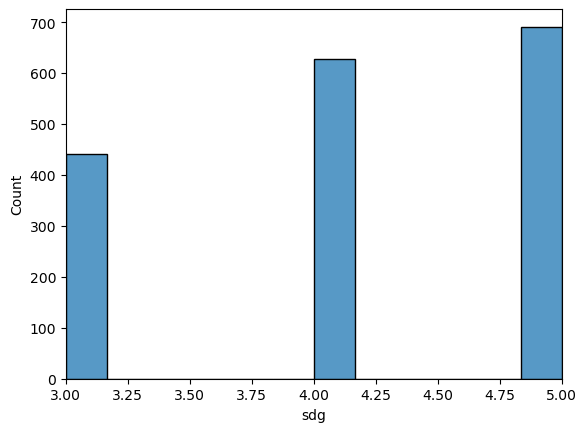

In [1123]:
# Create a histogram plot of selling prices
import seaborn as sns

# Create a histogram plot of selling prices
sns.histplot(data_t_nuevo['sdg'])
plt.xlim(3, 5)
# Display the plot
plt.show()

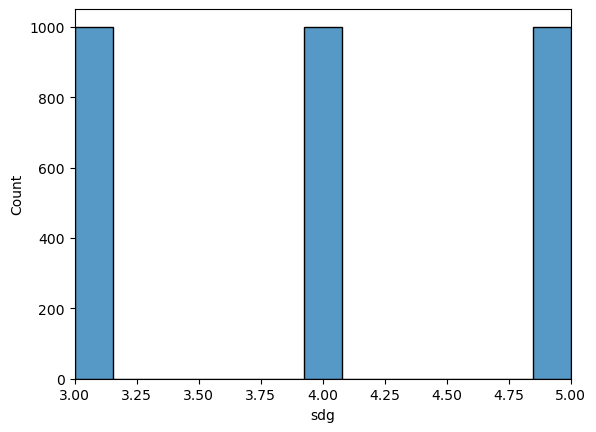

In [1124]:
sns.histplot(data_t['sdg'])
plt.xlim(3, 5)
plt.show()

In [1125]:
data_t_nuevo.sample(5)

,Textos_espanol,sdg,words
913,"La implicación es que la aspiración de los estudiantes VET de ingresar a la educación terciaria es bastante consistente con la experiencia de los países de la OCDE. También implica en Egipto como en otros lugares que los programas vocacionales deben preparar a los estudiantes no solo para el ingreso directo al mercado laboral, sino también para una gama de programas educativos y de capacitación adicionales, incluida la educación terciaria. Esto implica un énfasis suficiente en las habilidades básicas de lectoescritura y aritmética para sustentar el aprendizaje posterior.",4,implicacion aspiracion estudiantes vet ingresar educacion terciaria bastante consistente experiencia paises ocde tambien implica egipto lugares programas vocacionales deben preparar estudiantes solo ingreso directo mercado laboral sino tambien gama programas educativos capacitacion adicionales incluida educacion terciaria implica enfasis suficiente habilidades basicas lectoescritura aritmetica sustentar aprendizaje posterior
1098,"Las familias pueden permitir que las mujeres y las niñas prosperen y desarrollen su potencial, además de ser los componentes básicos de comunidades, sociedades y economías prósperas. Pero las familias pueden tener un lado más oscuro: pueden ser lugares de violencia y discriminación, espacios donde a las mujeres y las niñas a menudo se les niegan los recursos que necesitan, donde a veces comen menos y son las últimas y donde se silencian sus voces y se niega su autonomía. Como tal, el reconocimiento de las familias como un espacio ambivalente para mujeres y niñas ha estado en el centro de este Informe.",5,familias pueden permitir mujeres ninas prosperen desarrollen potencial ademas ser componentes basicos comunidades sociedades economias prosperas familias pueden tener lado mas oscuro pueden ser lugares violencia discriminacion espacios mujeres ninas menudo niegan recursos necesitan veces comen menos ultimas silencian voces niega autonomia tal reconocimiento familias espacio ambivalente mujeres ninas centro informe
779,"Se informaron cantidades decrecientes de incautaciones de ketamina en Indonesia (de 117 kg en 2010 a 4,7 kg en 2013) y Malasia. Se sigue denunciando la incautación de las sustancias psicoactivas de origen vegetal kratom y khat y la erradicación de su cultivo. Tailandia notificó el mayor total de incautaciones de kratom en la región en 2014 (54 t), frente a las 45,5 t de 2013. También se informó de incautaciones considerables de kratom en Myanmar (219 kg en 2013). Se incautaron más de 6 toneladas de khat en Hong Kong, China, en 2014. Se encontraron casi 2 toneladas de hojas de khat importadas de África en las instalaciones de almacenamiento de cuatro empresas de logística, con destino a los Estados Unidos, Canadá y la provincia china de Taiwán.",3,informaron cantidades decrecientes incautaciones ketamina indonesia one hundred and seventeen kg two thousand and ten 47 kg two thousand and thirteen malasia sigue denunciando incautacion sustancias psicoactivas origen vegetal kratom khat erradicacion cultivo tailandia notifico mayor total incautaciones kratom region two thousand and fourteen fiftyfour t frente 455 t two thousand and thirteen tambien informo incautaciones considerables kratom myanmar two hundred and nineteen kg two thousand and thirteen incautaron mas six toneladas khat hong kong china two thousand and fourteen encontraron casi two toneladas hojas khat importadas africa instalaciones almacenamiento cuatro empresas logistica destino unidos canada provincia china taiwan
1468,"Sin embargo, la brecha en la participación laboral entre mujeres pobres y no pobres cambió poco entre el inicio y el final de la primera década de los 2000. Dado que las desigualdades socioeconómicas y de género están estrechamente vinculadas, la reducción de cualquier tipo de desigualdad requiere abordar la conciliación de la vida laboral y familiar a través de políticas públicas. Además, no todas las polí